In [1]:
import bilby
import numpy as np
import pandas as pd
import os

# observed oran data

In [3]:
obs_data=np.loadtxt("/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/oran.txt")
obs_data_2GC=bilby.result.read_in_result('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/u_hype_oran_2GC_result.json')
obs_data_TOP=bilby.result.read_in_result('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/u_hype_oran_TOP_result.json')
obs_2GC_pos=np.array(obs_data_2GC.posterior.iloc[:,0:6])
obs_TOP_pos=np.array(obs_data_TOP.posterior.iloc[:,0:4])
np.savetxt('obs_2GC_pos.txt',obs_2GC_pos)
np.savetxt('obs_TOP_pos.txt',obs_TOP_pos)


# birth mass computed by Li21 n=3


In [ ]:
li3_data=np.loadtxt("/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/cal_li.txt")
li3_data_2GC=bilby.result.read_in_result('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/u_hype_li3_2GC_result.json')
li3_data_TOP=bilby.result.read_in_result('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/u_hype_li3_TOP_result.json')
li3_2GC_pos=np.array(li3_data_2GC.posterior.iloc[:,0:6])
li3_TOP_pos=np.array(li3_data_TOP.posterior.iloc[:,0:4])
np.savetxt('li3_2GC_pos.txt',li3_2GC_pos)
np.savetxt('li3_TOP_pos.txt',li3_TOP_pos)

# birth mass computed by Li21 n=2

In [54]:
data_names=['cal_li','cal_li2','cal_tau','cal_tau2','cal_tau_p0']
for i in range(5):
    data=np.loadtxt("/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/{}.txt".format(data_names[i]))

In [58]:
pos_names=['li3','li2','tau2','tau3','tau_p0','oran']
for i in range(6):
    res_data_2GC=bilby.result.read_in_result('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/u_hype_{}_2GC_result.json'.format(pos_names[i]))
    res_data_TOP=bilby.result.read_in_result('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/u_hype_{}_TOP_result.json'.format(pos_names[i]))
    TGC_pos=np.array(res_data_2GC.posterior.iloc[:,0:6])
    TOP_pos=np.array(res_data_TOP.posterior.iloc[:,0:4])
    np.savetxt('{}_2GC_pos.txt'.format(pos_names[i]),TGC_pos)
    np.savetxt('{}_TOP_pos.txt'.format(pos_names[i]),TOP_pos)

In [60]:
res_data_POW=bilby.result.read_in_result('/home4/yzq/NS_mass/plot_data/ppd_data_posteriors/u_hype_{}_POW_result.json'.format(pos_names[0]))
POW_pos=np.array(res_data_POW.posterior.iloc[:,0:3])
np.savetxt('{}_POW_pos.txt'.format(pos_names[0]),POW_pos)

# plot corner for posteriors

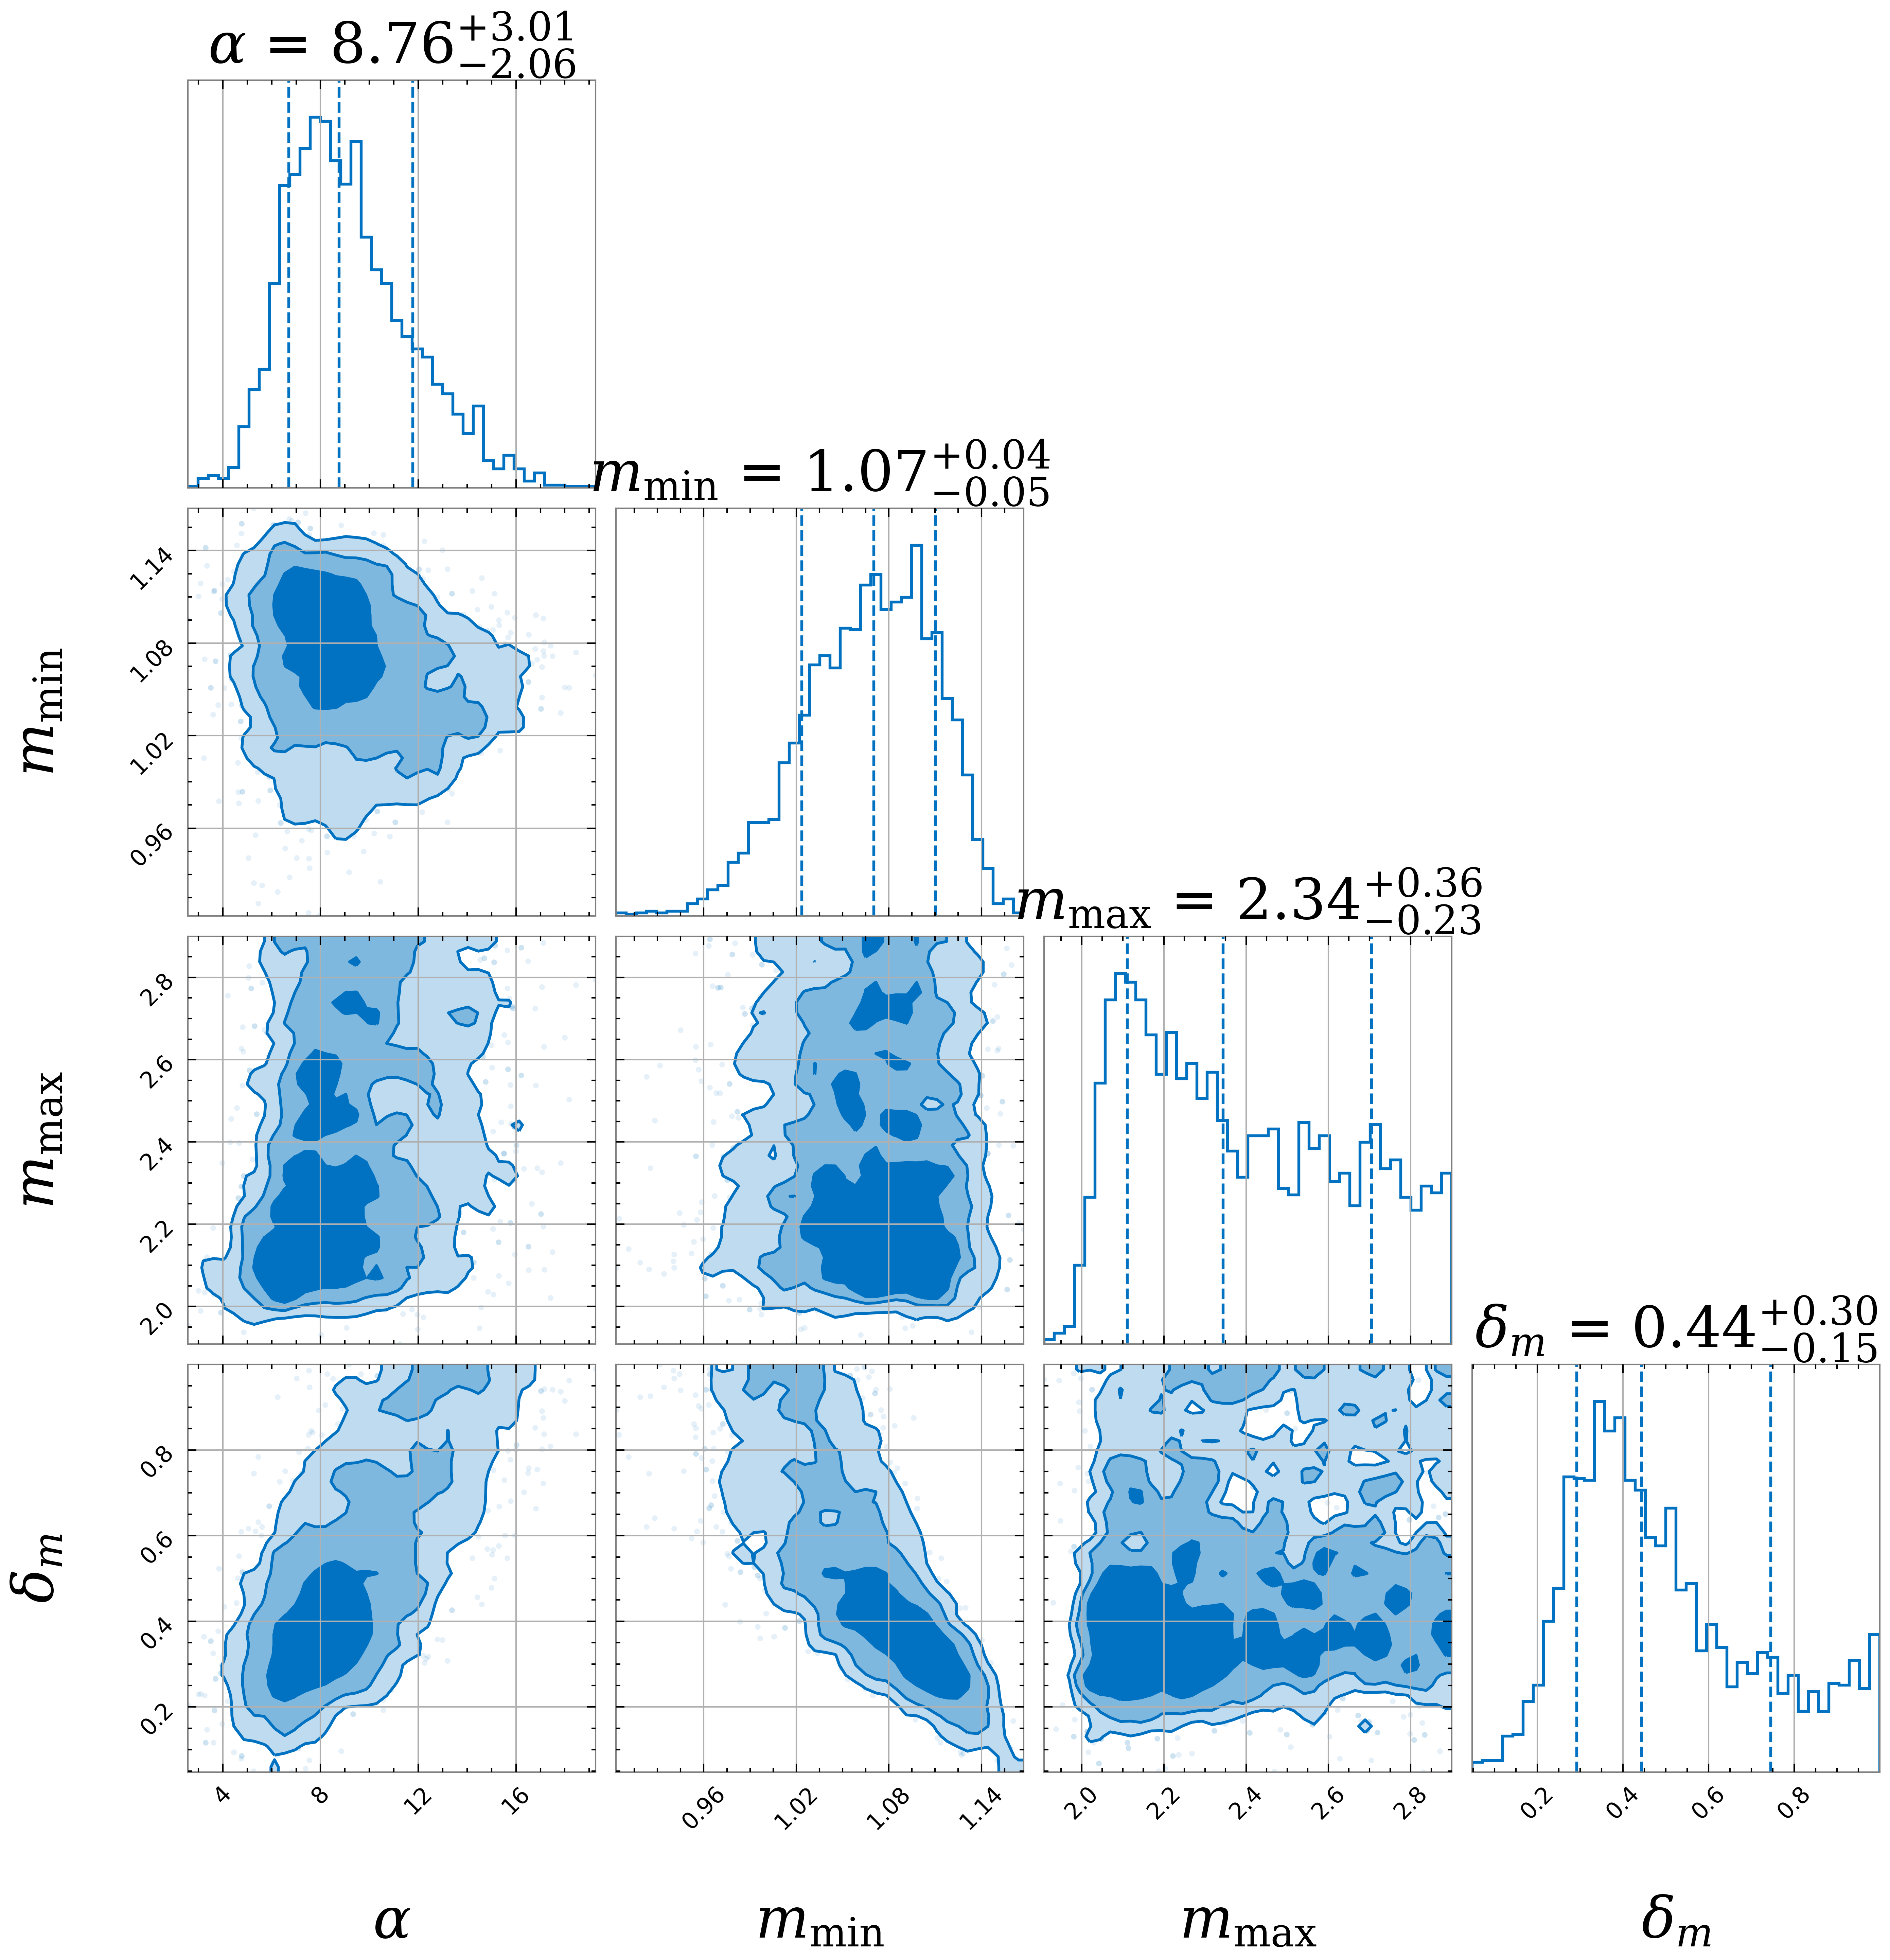

In [68]:
import corner
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

obs_TOP_pos = np.loadtxt('obs_TOP_pos.txt')

#plt.grid(b=False,linestyle='--',lw=0.2,alpha=0.5)
figure1= corner.corner(obs_TOP_pos, 
                       bins=40,smooth=0.9,color='#0072c1',
                       labels=[r'$\alpha$',r'$m_{\rm{min}} $',r'$ m_{\rm{max}} $',
                               r'$ \delta_m$'],
                       quantiles=[0.16, 0.5, 0.84],
                       levels=(1-np.exp(-0.5),1-np.exp(-1.5),1-np.exp(-3)),
                       plot_density=False, plot_datapoints=True, fill_contours=True,
                       label_kwargs=dict(fontsize=20),
                       show_titles=True, title_kwargs={"fontsize": 20})
plt.savefig('top_oran.pdf')
plt.show()